## SEMANA 02
### CÓMO AJUSTAR UNA DISTRIBUCIÓN DE PROBABILIDAD A DATOS EMPÍRICOS
#### MARYSOL CANTARERO VELAZQUEZ DEL VALLE

# AVANCE MIERCOLES

In [1]:
# Importando Paquetes
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import scipy.stats as st
import statsmodels.datasets
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
# Abriendo el data set con pandas
data = statsmodels.datasets.heart.load_pandas().data
data.tail()

,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


En la pestaña "censors" un censor de 0 muestra que el paciente seguía vivo al final del estudio,por lo cual, no se sabe el tiempo exacto de supervivencia(solo se sabe que el paciente sobrevivió al menos el número de días indicado). Por lo tanto y para simplificar, únicamente utilizaremos los datos sin censura ( por lo tanto, existe un sesgo hacia los pacientes que no sobrevivieron mucho tiempo después del transplante:

In [3]:
data = data[data.censors == 1]  # seleccionando cesores con valor 1
survival = data.survival  # agarrando columna survival que es la que se analizará

Ahora observemos los datos gráficamente, trazando los datos de supervivencia y el histograma:

Text(0,0.5,'Number of patients')

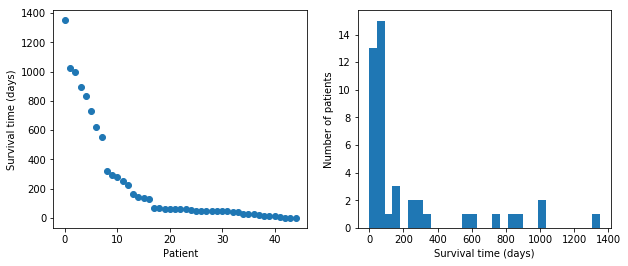

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=30)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

In [5]:
#CON PLOTLY
data1 = [go.Scatter(y= sorted(survival)[::-1], mode= 'markers')]
layout = go.Layout(title='Días de supervivencia por paciente', xaxis=dict(title='Patient'),yaxis=dict(title='Survival time(days)'))
fig = go.Figure(data=data1,layout=layout)
iplot(fig, filename = 'Hist')

In [6]:
#CON PLOTLY
data2 = [go.Histogram(x=survival, nbinsx= 30)]
layout = go.Layout(title='Número de pacientes que sobreviveron', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
fig = go.Figure(data=data2,layout=layout)
iplot(fig, filename = 'Hist')

In [7]:
#COMBINANDO LAS DOS GRÁFICAS
#data= [data1, data2]
data1 = go.Scatter(y= sorted(survival)[::-1], mode= 'markers', name= 'Días de supervivencia por paciente')
data2 = go.Histogram(x=survival, nbinsx= 30, name='Número de pacientes que sobreviveron')
fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(data1,1,1)
fig.append_trace(data2,1,2)
fig['layout'].update(title='Gráficando con Plotly')
fig['layout']['xaxis1'].update(title='Patient')
fig['layout']['xaxis2'].update(title='Survival time(days)')
fig['layout']['yaxis1'].update(title='Survival time(days)')
fig['layout']['yaxis2'].update(title='Number of patients')
#layout = go.Layout(title='Número de pacientes que sobreviveron', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
#layout = go.Layout(barmode='stack')
#fig = go.Figure(data=data2,layout=layout)
iplot(fig, filename = 'Hist')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



La primer gráfica nos muestra el tiempo de supervivencia de cada paciente, mientras que el histograma muestra el número de personas que sobrevivieron de acuerdo al número de días.Como podemos observar el histograma decrese rapido, lo cual quiere decir que el mayor número de pacientes sobrevive hasta los 350 días aproximadamente. 

# MÉTODO PARAMÉTRICO
Por la forma de la distribución de los datos los intentaremos ajustar a una distribución exponencial.

## Distribución exponencial
$X\sim Exp(\beta)$ Parámetros: Media $\beta>0$ o tasa = $\lambda = 1/\beta$

$$\textbf{Función de densidad de probabilidad}\\f(x) = \frac{1}{\beta} e^{-\frac{x}{\beta}} = \lambda e^{-\lambda x} $$
$$\textbf{Función de distribución de probabilidad}\\F(x) = 1-e^{-\frac{x}{\beta}} = \ 1 - e^{-\lambda x}$$

### Ejemplos
Ejemplos para la distribución exponencial **es la distribución de la longitud de los intervalos de una variable continua que transcurren entre dos sucesos**, que se distribuyen según la distribución de Poisson.

   - El tiempo transcurrido en un centro de llamadas hasta recibir la primera llamada del día se podría modelar como una exponencial.
   - El intervalo de tiempo entre terremotos (de una determinada magnitud) sigue una distribución exponencial.
   - Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.
   - En fiabilidad de sistemas, un dispositivo con tasa de fallo constante sigue una distribución exponencial.


In [8]:
#CALCULANDO EL PARAMETRO LAMBDA.
smean = survival.mean()
rate = 1. / smean

Para comparar la distribución exponencial ajustada con los datos, primero debemos generar valores linealmente espaciados para el eje x (días):

In [9]:
smax = survival.max()
days = np.linspace(0, smax, 1000)
# bin size: interval between two
# consecutive values in `days`
dt = smax / 999

Podemos obtener la función de densidad de probabilidad de la distribución exponencial con SciPy. El parámetro es la escala, el inverso de la tasa estimada.

In [10]:
dist_exp = st.expon.pdf(days, scale=1/ rate)

Ahora, vamos a trazar el histograma y la distribución obtenida. Necesitamos volver a escalar la distribución teórica al histograma (según el tamaño de la bandeja y el número total de puntos de datos):

Text(0,0.5,'Number of patients')

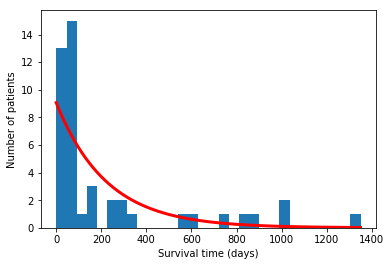

In [11]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

In [12]:
#CON PLOTLY
data1 = go.Scatter(y= (dist_exp * len(survival) * smax / nbins), mode= 'markers', name= 'Función exponencial')
data2 = go.Histogram(x=survival, nbinsx= 30, name='Survival')
data= [data1, data2]
layout = go.Layout(title='Comparación con distribución obtenida', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = 'Hist')

El ajuste está lejos de ser perfecto, en esta ocasión se pudo encontrar una fórmula analítica para la estimación de probabilidad máxima pero en situaciones más complejas, eso no siempre es posible. Por lo tanto, es posible que tengamos que recurrir a métodos numéricos. SciPy en realidad integra rutinas numéricas de máxima verosimilitud para un gran número de distribuciones. Aquí, usamos este otro método para estimar el parámetro de la distribución exponencial.

In [13]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

Podemos usar estos parámetros para realizar una prueba de Kolmogorov-Smirnov, que evalúa la bondad de ajuste de la distribución con respecto a los datos. Esta prueba se basa en una distancia entre la función de distribución empírica de los datos y la función de distribución acumulativa (CDF) de la distribución de referencia.

## Pruebas de hipótesis

La prueba de hipótesis básica que uno puede desear ejecutar se refiere al valor esperado:
- Probamos la hipótesis nula Ho: $\mu = \mu_0$, para un $\mu_0$ dado,
- contra la hipótesis alternativa Ha: $\mu\neq \mu_0$

En el caso normal, confiamos en el resultado de distribución de Eq. (4.3), donde el el valor esperado desconocido $\mu$ se reemplaza por el valor hipotético $\mu_0$. Esto muestra que, si la hipótesis nula es verdadera, entonces

$$P\bigg(-t_{n-1,1-\alpha/2}\leq {\bar X-\mu_0\over S/\sqrt n} \leq t_{n-1,1-\alpha/2}\bigg) = 1-\alpha$$

En otras palabras, todo se reduce a analizar el estadístico de prueba estandarizado
$$T={\bar X-\mu_0\over S/\sqrt n}$$

si la hipótesis nula es verdadera, tiene una distribución t de Student con n - 1 grados de libertad, y debe estar dentro de los límites correspondientes a los cuantiles. Si T cae fuera de ese intervalo, hay dos posibles explicaciones: puede ser simplemente mala suerte, o tal vez la hipótesis nula es incorrecta. No podemos estar seguros de ninguno de los dos, y podemos cometer dos tipos de error: podemos rechazar una hipótesis verdadera, o podemos aceptar una falsa. El enfoque elemental es conservador y mantiene la probabilidad de rechazar una verdadera hipótesis nula bajo control. Por lo tanto, formamos una región de rechazo que consta de dos colas

$$RJ = \{t:t<-t_{n-1,1-\alpha/2}\}U\{t:t>t_{n-1,1-\alpha/2}\}$$

Se rechaza la hipótesis nula si el estadístico $T\in RJ$. Acá $\alpha$ juega un papel de el nivel de significancia o mejor dicho, la probabilidad  de rechazar la hipótesis nula si esta es cierta. El valor típico para este nivel de significancia es tomarlo en 5%.

$$p-value= P(T)=P\bigg({\bar X -\mu_0 \over S/\sqrt n}\bigg)\sim t_{n-1}$$

La prueba mide si el puntaje promedio difiere significativamente entre las muestras. Si observamos un valor de p grande, por ejemplo mayor que 0.05 o 0.1, entonces no podemos rechazar la hipótesis nula. Si el valor p es menor que el umbral, p. 1%, 5% o 10%, luego rechazamos la hipótesis nula. Los pequeños valores p se asocian con grandes t-estadísticas.

In [14]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785181717e-06)

En este caso, el valor p es muy bajo: la hipótesis nula (que indica que los datos observados se derivan de una distribución exponencial con un parámetro de tasa de probabilidad máxima) puede rechazarse con alta confianza. Probemos con otra distribución, la distribución Birnbaum-Sanders, que normalmente se usa para modelar los tiempos de falla.

In [15]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07321149700086327)

Esta vez, el valor p es aproximadamente 0.073, por lo que no rechazaríamos la hipótesis nula con un nivel de confianza del cinco por ciento. Al trazar la distribución resultante, observamos un mejor ajuste que con la distribución exponencial:

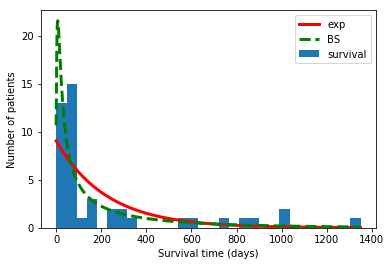

In [16]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

In [17]:
#CON PLOTLY
data1 = go.Scatter(y= (dist_exp * len(survival) * smax / nbins), mode= 'markers', name= 'Dist exp')
data2 = go.Histogram(x=survival, nbinsx= 30, name='Survival')
data3 = go.Scatter(y= (dist_fl * len(survival) * smax / nbins), mode= 'markers', name= 'Dist fl')
data= [data1, data2 , data3]
layout = go.Layout(title='Comparación con distribuciones obtenidas', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = 'Hist')

# MÉTODO NO PARAMÉTRICO

Con el método paramétrico se tenían modelos estadísticos(como el exponencial) que describen los datos y se estimo un solo parametro(la tasa o lambda). Las estimaciones no parametricas utilizan modelos estadísticos que no partenecen a la familia de distribuciones conocidas, or lo cual tiene una enorme flexibilidad. 

El espacio de parámetros es entonces infinito-dimensional en lugar de finito-dimensional (es decir, estimamos funciones en lugar de números).

Aquí, usamos una estimación de densidad del kernel (KDE) para estimar la función de densidad de probabilidad en torno a los valores muestrales.

In [18]:
kde = st.gaussian_kde(survival,.1)

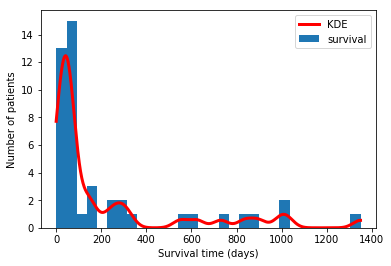

In [19]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, kde(days) * len(survival) * smax / nbins,
        '-r', lw=3, label='KDE')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

In [20]:
#CON PLOTLY
data1 = go.Scatter(y= (kde(days) * len(survival) * smax / nbins), mode= 'markers', name= 'KDE')
data2 = go.Histogram(x=survival, nbinsx= 30, name='Survival')
data= [data1, data2]
layout = go.Layout(title='Comparación con distribución obtenida', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = 'Hist')

Como se puede observar, este método no toma una distribución de probabilidad ya conocida, sino que los datos observados con las que la determinan. La utilización de este tipo de métodos se recomienda cuando no se puede asumir que los datos se ajusten a una distribución conocida.

# AVANCE SABADO

Con el mismo conjunto de datos se 

In [21]:
def best_fit_distribution(data, bins=200):    
    """Model data by finding best fit distribution to data"""
    '''O. Jaramillo Zuloaga'''
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    from scipy import stats as st
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf    
    for distribution in DISTRIBUTIONS:
        import warnings        
        try:                
            warnings.filterwarnings('ignore')                
            params = distribution.fit(data)
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))                                
            if best_sse > sse:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except Exception:
            pass 
    return (best_distribution.name, best_params)

In [22]:
best_fit_distribution(survival)

('t', (0.5730208037157258, 48.72842675464507, 23.60293249822753))

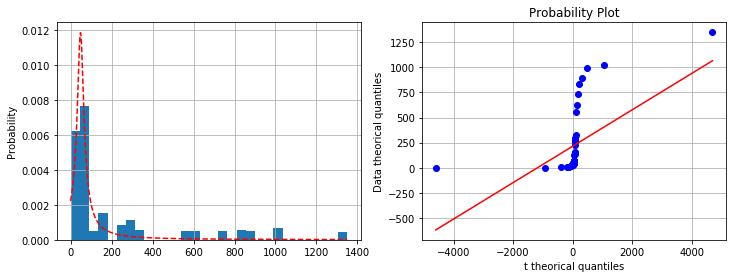

In [24]:
measurements1 = np.random.choice(survival, size = 3000)
plt.figure(1,figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(measurements1,bins=30, density = True)
#x = np.linspace(survival.min(), survival.max(), 100)
x=days
a,b,c = 0.5730208037157258, 48.72842675464507, 23.60293249822753
distt = st.t.pdf(x,a,b,c)
plt.plot(x,distt,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(1,2,2)
grap1 = st.probplot(survival,sparams=(a,b,c), dist="t", plot=plt)
plt.grid()
plt.xlabel('t theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Quitando la distribución t como mejor, la siguiente mejor fue la distribución laplace.

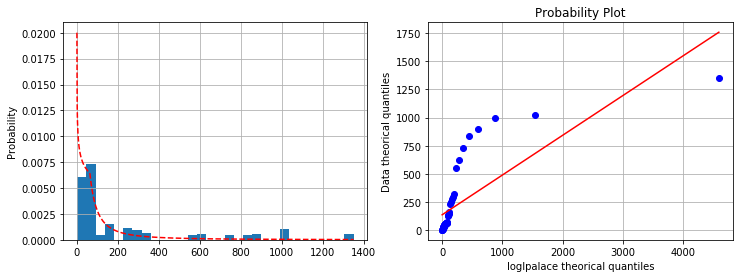

In [26]:
measurements1 = np.random.choice(survival, size = 3000)
plt.figure(1,figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(measurements1,bins=30, density = True)
#x = np.linspace(survival.min(), survival.max(), 100)
x=days
d,e,f = 0.8135076403625356, -0.14503358965371277, 63.145051428492266
dist_l = st.loglaplace.pdf(x,d,e,f)
plt.plot(x,dist_l,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(1,2,2)
grap1 = st.probplot(survival,sparams=(d,e,f), dist="loglaplace", plot=plt)
plt.grid()
plt.xlabel('loglpalace theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

In [28]:
# DISTRIBUCIÓN T
dist = st.t
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.2205176715290762, pvalue=0.02109726369304621)

In [29]:
# DISTRIBUCIÓN LOGLAPLACE
dist = st.loglaplace
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.11304101744829897, pvalue=0.5886458920630877)

El valor p es aproximadamente 0.021, por lo que no rechazaríamos la hipótesis nula con un nivel de confianza del 5%. Al trazar la distribución resultante, observamos un mejor ajuste que con la distribución exponencial con la que se empezo ajustando.

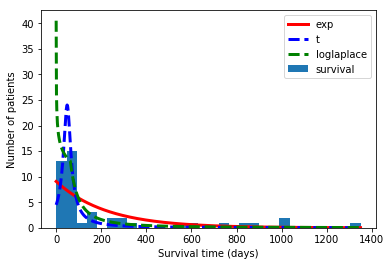

In [33]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, distt * len(survival) * smax / nbins,
        '--b', lw=3, label='t')
ax.plot(days, dist_l * len(survival) * smax / nbins,
        '--g', lw=3, label='loglaplace')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

In [34]:
#CON PLOTLY
data1 = go.Scatter(y= (dist_exp * len(survival) * smax / nbins), mode= 'markers', name= 'Dist exp')
data2 = go.Histogram(x=survival, nbinsx= 30, name='Survival')
data3 = go.Scatter(y= (distt * len(survival) * smax / nbins), mode= 'markers', name= 'Dist t')
data4 = go.Scatter(y= (dist_l * len(survival) * smax / nbins), mode= 'markers', name= 'Dist loglaplace')
data= [data1, data2 , data3, data4]
layout = go.Layout(title='Comparación con distribuciones obtenidas', xaxis=dict(title='Survival time(days)'),yaxis=dict(title='Number of patients'))
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = 'Hist')